In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [91]:
df=pd.read_csv("Total.csv")
df

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,Not Provided,567595.43,567595.43,2011,NaN,NaN,567595.43
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,Not Provided,538909.28,538909.28,2011,NaN,NaN,NaN
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,Not Provided,335279.91,335279.91,2011,NaN,NaN,NaN
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,Not Provided,332343.61,332343.61,2011,NaN,NaN,NaN
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,Not Provided,326373.19,326373.19,2011,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
312877,Daniel W Plautz,Public Service Trainee,0.0,0.0,0.0,0.0,0.00,0.00,2018,NaN,NaN,NaN
312878,David J Thompson,Deputy Sheriff,0.0,0.0,0.0,0.0,0.00,0.00,2018,NaN,NaN,NaN
312879,Keiko Weng Yee Lau,Public Service Trainee,0.0,0.0,0.0,0.0,0.00,0.00,2018,NaN,NaN,NaN
312880,David Wong,Deputy Sheriff,0.0,0.0,0.0,0.0,0.00,0.00,2018,NaN,NaN,NaN


In [92]:
df=df[['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits','Year', 'TotalPayBenefits']]


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312882 entries, 0 to 312881
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      312882 non-null  object 
 1   JobTitle          312882 non-null  object 
 2   BasePay           312882 non-null  object 
 3   OvertimePay       312882 non-null  object 
 4   OtherPay          312882 non-null  object 
 5   Benefits          312882 non-null  object 
 6   Year              312882 non-null  int64  
 7   TotalPayBenefits  312882 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 19.1+ MB


In [94]:


def converts(df1,list1):
    try:
        
        for i in list1:
        
            df1[i]=df1[i].replace({'Not Provided':0})
            df1[i]=df1[i].astype(float).astype(int)
        
        return df1
    
    except Exception:
        
        print("Error is found")


l1=['BasePay','OvertimePay','OtherPay','Benefits','TotalPayBenefits']
result=converts(df,l1)


In [95]:
l1=['BasePay','OvertimePay','OtherPay','Benefits','TotalPayBenefits']
for j in l1:
     
    res=df[df[j]=='Not Provided']
print(res)
    

Empty DataFrame
Columns: [EmployeeName, JobTitle, BasePay, OvertimePay, OtherPay, Benefits, Year, TotalPayBenefits]
Index: []


In [96]:
df.describe()

,BasePay,OvertimePay,OtherPay,Benefits,Year,TotalPayBenefits
count,312882.000000,312882.000000,312882.000000,312882.000000,312882.000000,312882.000000
mean,69672.670978,5668.670240,3460.390329,22125.262623,2014.625303,100927.848902
std,45436.770132,12745.525827,7387.169347,16289.100115,2.290899,66485.183823
min,-474.000000,-292.000000,-7058.000000,-13939.000000,2011.000000,-3628.000000
25%,35341.250000,0.000000,0.000000,2079.000000,2013.000000,48954.500000
50%,67645.500000,0.000000,728.000000,26771.000000,2015.000000,100011.000000
75%,99235.500000,5223.000000,3958.000000,34288.000000,2017.000000,142376.000000
max,592394.000000,309481.000000,400184.000000,125891.000000,2018.000000,712802.000000


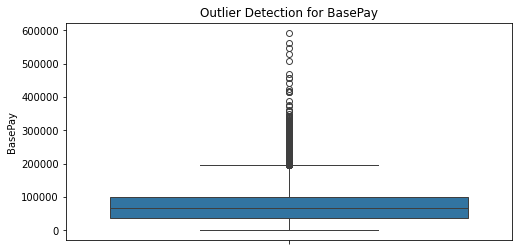

BasePay


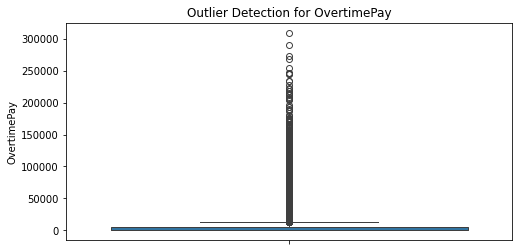

OvertimePay


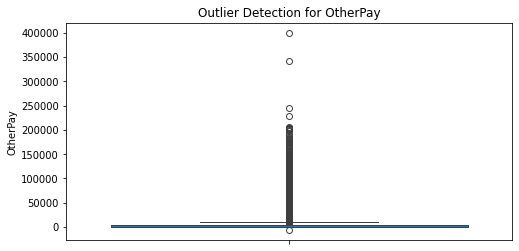

OtherPay


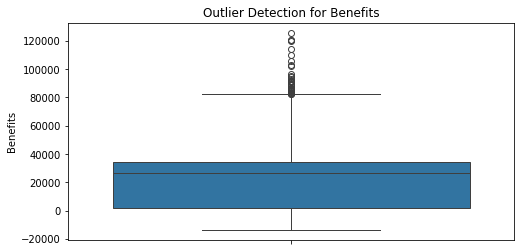

Benefits


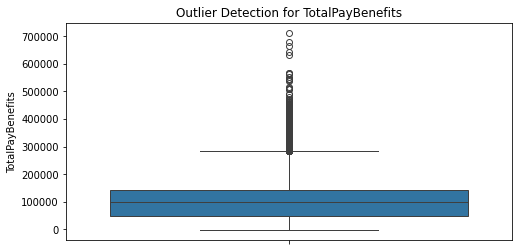

TotalPayBenefits


In [97]:
def outlier_detection(df,col):
    try:
        
        plt.figure(figsize=(8, 4))
        sns.boxplot(df[col])
        plt.title(f'Outlier Detection for {col}')
        plt.show()
    
        return col

    except Exception as e:
        
        return f"An unexpected error occurred with {col_name}: {e}"

col=['BasePay', 'OvertimePay', 'OtherPay',
       'Benefits','TotalPayBenefits']
for i in col:
    result=outlier_detection(df,i)
    print(result)
    

In [98]:
def outlier_handling(series):
    
    q1=series.quantile(0.25)
    q2=series.quantile(0.75)
    IQR=q2-q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q2 + 1.5 * IQR
    

    return lower_bound ,upper_bound




value=['BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'Year', 'TotalPayBenefits']
for i in value:
    
    
    lower_bound ,upper_bound =outlier_handling(df[i])
    
   # print(f"Q1 (25th percentile): {q1}")
    #print(f"Q3 (75th percentile): {q2}")
    #print(f"IQR: {IQR}")
    print(f"{i}")
    print(f"Lower Fence (Outlier Threshold): {lower_bound}")
    print(f"Upper Fence (Outlier Threshold): {upper_bound}")
    

    
    


BasePay
Lower Fence (Outlier Threshold): -60500.125
Upper Fence (Outlier Threshold): 195076.875
OvertimePay
Lower Fence (Outlier Threshold): -7834.5
Upper Fence (Outlier Threshold): 13057.5
OtherPay
Lower Fence (Outlier Threshold): -5937.0
Upper Fence (Outlier Threshold): 9895.0
Benefits
Lower Fence (Outlier Threshold): -46234.5
Upper Fence (Outlier Threshold): 82601.5
Year
Lower Fence (Outlier Threshold): 2007.0
Upper Fence (Outlier Threshold): 2023.0
TotalPayBenefits
Lower Fence (Outlier Threshold): -91177.75
Upper Fence (Outlier Threshold): 282508.25


In [99]:
col=['BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPayBenefits']

bound={
    'Basepay':{'lower_bound':-60500.125,'upper_bound':195076.875},
    'OvertimePay':{'lower_bound':-7834.5,'upper_bound':13057.5},
    'OtherPay':{'lower_bound':-5937.0,'upper_bound':9895.0},
    'Benefits':{'lower_bound':-46234.5,'upper_bound':82601.5},
    'TotalPayBenefits':{'lower_bound':-91177.75,'upper_bound':282508.25},
}
for j in col:
    
    df1=df[(df[j]>=lower_bound)& (df[j]<=upper_bound)]
    
    

In [100]:
df1.reset_index()

,index,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,Year,TotalPayBenefits
0,17,SEBASTIAN WONG,"CAPTAIN, EMERGENCYCY MEDICAL SERVICES",140546,119397,18625,0,2011,278569
1,18,MARTY ROSS,"BATTALION CHIEF, (FIRE DEPARTMENT)",168692,69626,38115,0,2011,276434
2,19,ELLEN MOFFATT,ASSISTANT MEDICAL EXAMINER,257510,880,16159,0,2011,274550
3,20,VENUS AZAR,ASSISTANT MEDICAL EXAMINER,257510,0,16679,0,2011,274190
4,21,JUDY MELINEK,ASSISTANT MEDICAL EXAMINER,257510,377,15883,0,2011,273771
...,...,...,...,...,...,...,...,...,...
310867,312877,Daniel W Plautz,Public Service Trainee,0,0,0,0,2018,0
310868,312878,David J Thompson,Deputy Sheriff,0,0,0,0,2018,0
310869,312879,Keiko Weng Yee Lau,Public Service Trainee,0,0,0,0,2018,0
310870,312880,David Wong,Deputy Sheriff,0,0,0,0,2018,0


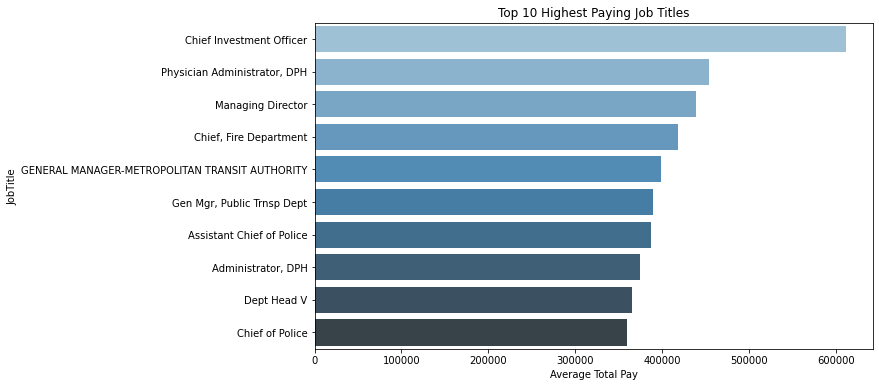

In [101]:
#Top 10 Highest Paying Job Titles
# Group by job title and get the mean TotalPay
job_salary =df.groupby('JobTitle')['TotalPayBenefits'].mean().sort_values(ascending
=False).head(10)
# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=job_salary.values, y=job_salary.index,
palette='Blues_d')
plt.title('Top 10 Highest Paying Job Titles')
plt.xlabel('Average Total Pay')
plt.show()


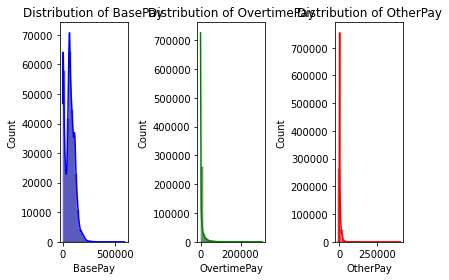

In [102]:
plt.subplot(1,3,1)
sns.histplot(df['BasePay'], bins=30, kde=True, color='blue')
plt.title('Distribution of BasePay')

plt.subplot(1,3,2)
sns.histplot(df['OvertimePay'], bins=30, kde=True,
color='green')
plt.title('Distribution of OvertimePay')

plt.subplot(1,3,3)
sns.histplot(df['OtherPay'], bins=30, kde=True, color='red')
plt.title('Distribution of OtherPay')
plt.tight_layout()
plt.show()


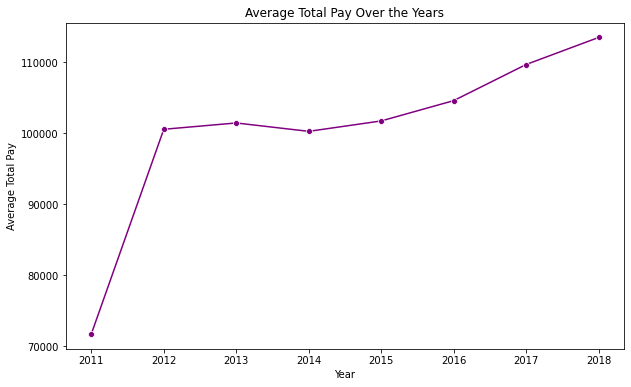

In [103]:
# Group by Year and calculate mean total pay
pay_over_years = df.groupby('Year')['TotalPayBenefits'].mean()
# Plot
plt.figure(figsize=(10,6))
sns.lineplot(x=pay_over_years.index, y=pay_over_years.values,
marker='o', color='purple')
plt.title('Average Total Pay Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Total Pay')
plt.show()

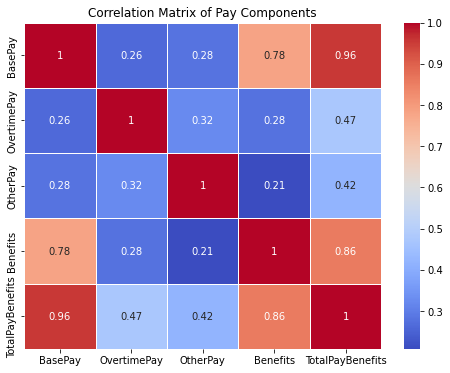

In [104]:
# Correlation matrix
plt.figure(figsize=(8,6))
corr_matrix = df[['BasePay', 'OvertimePay', 'OtherPay',
'Benefits', 'TotalPayBenefits']].corr()
# Plotting heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',
linewidths=0.5)
plt.title('Correlation Matrix of Pay Components')
plt.show()

In [105]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['BasePay', 'OvertimePay', 'OtherPay','Benefits', 'Year', 'TotalPayBenefits']] =scaler.fit_transform(df[['BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'Year', 'TotalPayBenefits']])

In [106]:
from sklearn.model_selection import train_test_split

X = df.drop(['TotalPayBenefits','JobTitle','EmployeeName'], axis=1)
y = df['TotalPayBenefits']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model1 = LinearRegression()
model1.fit(X_train, y_train)
# Predict and evaluate
predictions = model1.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'MSE: {mse}, R²: {r2}')

MSE: 1.0682390696305363e-10, R²: 0.9999999998931514


In [108]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
# Predict and evaluate
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'MSE: {mse}, R²: {r2}')

MSE: 0.0008494382805382504, R²: 0.9991503654384347


In [109]:
x_test = pd.DataFrame([[16000, 1000, 500, 20000, 2009]], 
                      columns=['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'Year'])

y_pred=model1.predict(x_test)
print(f"The predicted salary is: {y_pred[0]:.2f}")

The predicted salary is: 16081.93
